# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/undefined/external-big-data-smart-technology-flaticons-lineal-color-flat-icons-2.png"/> **NLP Research <br>CRF Named Entity Recognition**
## <img src="https://img.icons8.com/external-fauzidea-flat-fauzidea/64/undefined/external-man-avatar-avatar-fauzidea-flat-fauzidea.png"/> **`Dimas Dwi Putra`**

# **CRF Model Architecture**

<center>

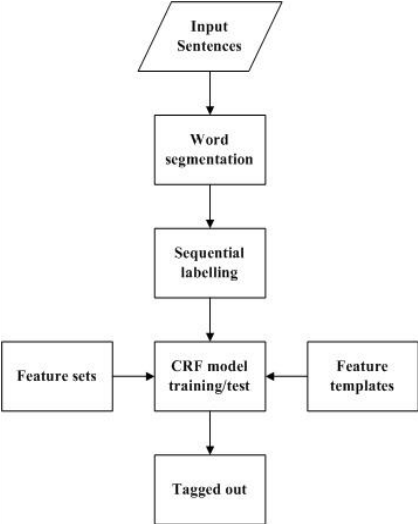

</center>

# **Connect Google Drive Storage**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Requirements Python Libraries**

In [ ]:
! pip install scikit-learn==0.23.1
! pip install sklearn-crfsuite
! pip install seaborn

# **Import Python Libraries**

In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn_crfsuite.metrics import flat_f1_score
from sklearn_crfsuite import CRF
from sklearn_crfsuite import metrics

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set(font_scale=1)
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# **NER Dataset With POS Tagging**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/CRF-NER/input/ner_dataset.csv', encoding = "ISO-8859-1")

## **Display 20 Data Pertama**

In [ ]:
df.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 0,studies,NNS,O
1,Sentence: 0,on,IN,O
2,Sentence: 0,magnesium,NN,O
3,Sentence: 0,s,NN,O
4,Sentence: 0,mechanism,NN,O
5,Sentence: 0,of,IN,O
6,Sentence: 0,action,NN,O
7,Sentence: 0,in,IN,O
8,Sentence: 0,digitalis,NN,plant
9,Sentence: 0,induced,VBD,O


## **Display 20 Data Terakhir**

In [ ]:
df.tail(20)

,Sentence #,Word,POS,Tag
38185,Sentence: 1309,use,NN,O
38186,Sentence: 1309,these,DT,O
38187,Sentence: 1309,findings,NNS,O
38188,Sentence: 1309,suggest,VBP,O
38189,Sentence: 1309,that,IN,O
38190,Sentence: 1309,part,NN,O
38191,Sentence: 1309,of,IN,O
38192,Sentence: 1309,the,DT,O
38193,Sentence: 1309,association,NN,O
38194,Sentence: 1309,between,IN,O


## **Describe NER Data**

In [ ]:
df.describe()

,Sentence #,Word,POS,Tag
count,38205,38205,38205,38205
unique,1310,3089,32,3
top,Sentence: 264,and,NN,O
freq,137,1704,11655,32002


## **Menghitung Jumlah Baris Dan Kolom**

In [ ]:
df.shape

(38205, 4)

## **Display Tag**

In [ ]:
df['Tag'].unique()

array(['O', 'plant', 'disease'], dtype=object)

## **Display POS**

In [ ]:
df['POS'].unique()

array(['NNS', 'IN', 'NN', 'VBD', 'DT', 'WDT', 'VBZ', 'RB', 'JJ', 'VBN',
       'CC', 'MD', 'VB', 'PRP$', 'CD', 'VBP', 'VBG', 'TO', 'EX', 'PRP',
       'WP', 'JJR', 'RBR', 'WRB', 'RP', 'JJS', 'FW', 'WP$', 'RBS', 'PDT',
       '$', 'NNP'], dtype=object)

## **Mengecek Null Data**

In [ ]:
df.isnull().sum()

Sentence #    0
Word          0
POS           0
Tag           0
dtype: int64

## **Detail Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38205 entries, 0 to 38204
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  38205 non-null  object
 1   Word        38205 non-null  object
 2   POS         38205 non-null  object
 3   Tag         38205 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


# **Class for get sentence. The each sentence will be list of tuples with tag and pos**

In [ ]:
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, p, t) for w, p, t in zip(s['Word'].values.tolist(), s['POS'].values.tolist(), s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None

## **Displaying one full sentence**

In [ ]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[1]

'the mechanism by which magnesium affects digitalis induced arrhythmias was studied in dogs with and without beta receptor'

## **Sentence with pos and tag**

In [ ]:
sent = getter.get_text()
print(sent)

[('the', 'DT', 'O'), ('mechanism', 'NN', 'O'), ('by', 'IN', 'O'), ('which', 'WDT', 'O'), ('magnesium', 'NN', 'O'), ('affects', 'VBZ', 'O'), ('digitalis', 'RB', 'plant'), ('induced', 'JJ', 'O'), ('arrhythmias', 'NN', 'disease'), ('was', 'VBD', 'O'), ('studied', 'VBN', 'O'), ('in', 'IN', 'O'), ('dogs', 'NNS', 'O'), ('with', 'IN', 'O'), ('and', 'CC', 'O'), ('without', 'IN', 'O'), ('beta', 'NN', 'O'), ('receptor', 'NN', 'O')]


In [ ]:
len(sentences[1])

121

## **Getting all the sentences in the dataset**

In [ ]:
sentences = getter.sentences

In [ ]:
df.loc[df['Tag'] == 'O', 'Word'].head()

0      studies
1           on
2    magnesium
3            s
4    mechanism
Name: Word, dtype: object

In [ ]:
df.loc[df['Tag'] == 'plant', 'Word'].head()

8     digitalis
17    digitalis
52    digitalis
58        green
59          tea
Name: Word, dtype: object

In [ ]:
df.loc[df['Tag'] == 'disease', 'Word'].head()

10    arrhythmias
19    arrhythmias
54    arrhythmias
65           skin
66     papillomas
Name: Word, dtype: object

# **Visualisasi**

## **Visualasi With Tag O**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


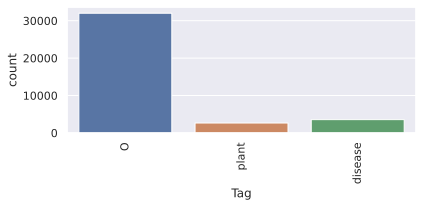

In [ ]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('Tag', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Visualisasi without Tag O**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


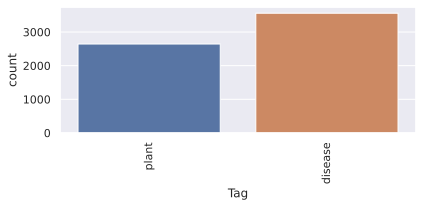

In [ ]:
plt.figure(figsize=(6, 3))
ax = sns.countplot('Tag', data=df.loc[df['Tag'] != 'O'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

## **Visualisasi POS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


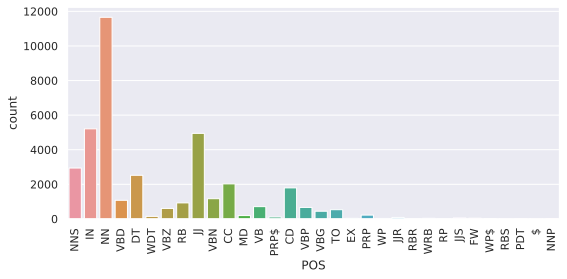

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot('POS', data=df, orient='h')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")
plt.tight_layout()
plt.show()

# **Feature Preparation**

## **These are the default features used by the NER in nltk.**

In [ ]:
def word2features(sent, i):
    word = sent[i][0]
    postag = sent[i][1]

    features = {
        'bias': 1.0,
        'word.lower()': word.lower(),
        'word[-3:]': word[-3:],
        'word[-2:]': word[-2:],
        'word.isupper()': word.isupper(),
        'word.istitle()': word.istitle(),
        'word.isdigit()': word.isdigit(),
        'postag': postag,
        'postag[:2]': postag[:2],
    }
    if i > 0:
        word1 = sent[i-1][0]
        postag1 = sent[i-1][1]
        features.update({
            '-1:word.lower()': word1.lower(),
            '-1:word.istitle()': word1.istitle(),
            '-1:word.isupper()': word1.isupper(),
            '-1:postag': postag1,
            '-1:postag[:2]': postag1[:2],
        })
    else:
        features['BOS'] = True

    if i < len(sent)-1:
        word1 = sent[i+1][0]
        postag1 = sent[i+1][1]
        features.update({
            '+1:word.lower()': word1.lower(),
            '+1:word.istitle()': word1.istitle(),
            '+1:word.isupper()': word1.isupper(),
            '+1:postag': postag1,
            '+1:postag[:2]': postag1[:2],
        })
    else:
        features['EOS'] = True

    return features


def sent2features(sent):
    return [word2features(sent, i) for i in range(len(sent))]

def sent2labels(sent):
    return [label for token, postag, label in sent]

def sent2tokens(sent):
    return [token for token, postag, label in sent]

In [ ]:
X = [sent2features(s) for s in sentences]
y = [sent2labels(s) for s in sentences]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## **Predicting on the test set**

In [ ]:
crf = CRF(algorithm = 'lbfgs',
          c1 = 0.1,
          c2 = 0.1,
          keep_tempfiles=None,
          max_iterations = 100,
          all_possible_transitions = False,
          verbose = True)

try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass

y_pred = crf.predict(X_test)

loading training data to CRFsuite: 100%|██████████| 1048/1048 [00:00<00:00, 2968.99it/s]



Feature generation
type: CRF1d
feature.minfreq: 0.000000
feature.possible_states: 0
feature.possible_transitions: 0
0....1....2....3....4....5....6....7....8....9....10
Number of features: 12383
Seconds required: 0.080

L-BFGS optimization
c1: 0.100000
c2: 0.100000
num_memories: 6
max_iterations: 100
epsilon: 0.000010
stop: 10
delta: 0.000010
linesearch: MoreThuente
linesearch.max_iterations: 20

Iter 1   time=0.04  loss=16244.92 active=12143 feature_norm=1.00
Iter 2   time=0.02  loss=15505.66 active=11658 feature_norm=1.03
Iter 3   time=0.02  loss=13553.09 active=11463 feature_norm=2.24
Iter 4   time=0.04  loss=10398.62 active=12321 feature_norm=2.60
Iter 5   time=0.02  loss=9826.93  active=12312 feature_norm=3.10
Iter 6   time=0.02  loss=8304.26  active=11486 feature_norm=4.99
Iter 7   time=0.02  loss=7677.04  active=11009 feature_norm=5.95
Iter 8   time=0.02  loss=7240.38  active=10920 feature_norm=6.58
Iter 9   time=0.02  loss=6742.36  active=10614 feature_norm=7.79
Iter 10  time=

In [ ]:
y_pred = y_pred

In [ ]:
labels = list(crf.classes_)
print(f"entities = {labels}")

entities = ['O', 'plant', 'disease']


# **Evaluating the model performance**

# **Precision, Recall, F-1 Score**

We will use precision, recall and f1-score metrics to evaluate the performance of the model

In [ ]:
# Precision
### Micro
micro_precision_o = metrics.flat_precision_score(y_test, y_pred, average = 'micro', labels=labels[0])
micro_precision_plant = metrics.flat_precision_score(y_test, y_pred, average = 'micro', labels=labels[1])
micro_precision_disease = metrics.flat_precision_score(y_test, y_pred, average = 'micro', labels=labels[2])
### Macro
macro_precision_o = metrics.flat_precision_score(y_test, y_pred, average = 'macro', labels=labels[0])
macro_precision_plant = metrics.flat_precision_score(y_test, y_pred, average = 'macro', labels=labels[1])
macro_precision_disease = metrics.flat_precision_score(y_test, y_pred, average = 'macro', labels=labels[2])
### weighted
weighted_precision_o = metrics.flat_precision_score(y_test, y_pred, average = 'weighted', labels=labels[0])
weighted_precision_plant = metrics.flat_precision_score(y_test, y_pred, average = 'weighted', labels=labels[1])
weighted_precision_disease = metrics.flat_precision_score(y_test, y_pred, average = 'weighted', labels=labels[2])

# Recall
### Micro
micro_recall_o = metrics.flat_recall_score(y_test, y_pred, average = 'micro', labels=labels[0])
micro_recall_plant = metrics.flat_recall_score(y_test, y_pred, average = 'micro', labels=labels[1])
micro_recall_disease = metrics.flat_recall_score(y_test, y_pred, average = 'micro', labels=labels[2])
### Macro
macro_recall_o = metrics.flat_recall_score(y_test, y_pred, average = 'macro', labels=labels[0])
macro_recall_plant = metrics.flat_recall_score(y_test, y_pred, average = 'macro', labels=labels[1])
macro_recall_disease = metrics.flat_recall_score(y_test, y_pred, average = 'macro', labels=labels[2])
### weighted
weighted_recall_o = metrics.flat_recall_score(y_test, y_pred, average = 'weighted', labels=labels[0])
weighted_recall_plant = metrics.flat_recall_score(y_test, y_pred, average = 'weighted', labels=labels[1])
weighted_recall_disease = metrics.flat_recall_score(y_test, y_pred, average = 'weighted', labels=labels[2])

# F-1
### Micro
micro_f1_score_o = flat_f1_score(y_test, y_pred, average = 'micro', labels=labels[0])
micro_f1_score_plant = flat_f1_score(y_test, y_pred, average = 'micro', labels=labels[1])
micro_f1_score_disease = flat_f1_score(y_test, y_pred, average = 'micro', labels=labels[2])
### Macro
macro_f1_score_o = flat_f1_score(y_test, y_pred, average = 'macro', labels=labels[0])
macro_f1_score_plant = flat_f1_score(y_test, y_pred, average = 'macro', labels=labels[1])
macro_f1_score_disease = flat_f1_score(y_test, y_pred, average = 'macro', labels=labels[2])
### weighted
weighted_f1_score_o = flat_f1_score(y_test, y_pred, average = 'weighted', labels=labels[0])
weighted_f1_score_plant = flat_f1_score(y_test, y_pred, average = 'weighted', labels=labels[1])
weighted_f1_score_disease = flat_f1_score(y_test, y_pred, average = 'weighted', labels=labels[2])


data_scores = {
    'Averages' : [
                  'Micro', 'Micro' ,'Micro', '', 
                  'Macro', 'Macro', 'Macro', '', 
                  'Weighted', 'Weighted', 'Weighted'],
    'Entities' : [
                  labels[0], labels[1], labels[2], '',  
                  labels[0], labels[1], labels[2], '',  
                  labels[0], labels[1], labels[2]],
    'Precision' : [
                   micro_precision_o, micro_precision_plant, micro_precision_disease, '', 
                   macro_precision_o, macro_precision_plant, macro_precision_disease, '', 
                   weighted_precision_o, weighted_precision_plant, weighted_precision_disease],
    'Recall' : [
                micro_recall_o, micro_recall_plant, micro_recall_disease, '', 
                macro_recall_o, macro_recall_plant, macro_recall_disease, '', 
                weighted_recall_o, weighted_recall_plant, weighted_recall_disease],
    'F-1 Scores' : [
                    micro_f1_score_o, micro_f1_score_plant, micro_f1_score_disease, '',
                    macro_f1_score_o, macro_f1_score_plant, macro_f1_score_disease, '',
                    weighted_f1_score_o, weighted_f1_score_plant, weighted_f1_score_disease
                  ]
}

df_data_scores = pd.DataFrame(data_scores)
df_data_scores

,Averages,Entities,Precision,Recall,F-1 Scores
0,Micro,O,0.955476,0.971334,0.96334
1,Micro,plant,0.938604,0.938604,0.938604
2,Micro,disease,0.938604,0.938604,0.938604
3,,,,,
4,Macro,O,0.955476,0.971334,0.96334
5,Macro,plant,0.886559,0.855756,0.869635
6,Macro,disease,0.886559,0.855756,0.869635
7,,,,,
8,Weighted,O,0.955476,0.971334,0.96334
9,Weighted,plant,0.936259,0.938604,0.936935


# **Menyimpan Report to dalam Excel**

In [ ]:
! pip install xlsxwriter

import xlsxwriter

writer = pd.ExcelWriter('/content/drive/MyDrive/bert_bilstm_crf_named_entity_recognition/CRF-NER/CRF_Report.xlsx', engine='xlsxwriter')
df_data_scores.to_excel(writer, sheet_name='Uji2', index=False)
writer.save()

In [ ]:
accuracy = metrics.flat_accuracy_score(y_test, y_pred)
print("Accuracy: {:.1%}".format(accuracy))

Accuracy: 93.9%


# **Check what classifier learned**

In [ ]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
O      -> O       1.495854
disease -> disease 1.127571
plant  -> plant   0.623030
plant  -> O       -0.264714
O      -> disease -0.350526
O      -> plant   -0.849121
disease -> O       -1.488976
plant  -> disease -2.267951
disease -> plant   -3.829912

Top unlikely transitions:
O      -> O       1.495854
disease -> disease 1.127571
plant  -> plant   0.623030
plant  -> O       -0.264714
O      -> disease -0.350526
O      -> plant   -0.849121
disease -> O       -1.488976
plant  -> disease -2.267951
disease -> plant   -3.829912


# **Check the state features**

In [ ]:
#@title
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(30))

print("\nTop negative:")
print_state_features(list(reversed(Counter(crf.state_features_).most_common()[-30:])))

Top positive:
4.551022 plant    word.lower():garlic
4.493458 plant    word.lower():onion
4.264688 disease  word.lower():toxicity
4.222283 plant    word.lower():coriander
4.128144 disease  word.lower():fracture
4.082973 plant    word.lower():pomegranate
3.735797 disease  word.lower():constipation
3.685102 O        -1:word.lower():atherosclerosis
3.552715 plant    word[-3:]:lis
3.485503 plant    word.lower():cannabis
3.485503 plant    word[-3:]:bis
3.425882 disease  word.lower():tuberculosis
3.417482 plant    -1:word.lower():glut4
3.373159 disease  word.lower():diabetic
3.347820 disease  word.lower():tumors
3.286809 plant    word.lower():wheat
3.253042 O        word.lower():diagnosis
3.226986 disease  word.lower():cancers
3.184723 disease  word.lower():hypertension
3.108042 O        word[-2:]:ed
3.062297 plant    word.lower():soybean
3.055379 O        word.lower():mortality
3.045129 plant    word.lower():digitalis
3.043809 O        word.lower():apoptosis
3.017170 plant    -1:word.lower()